In [1]:
import pandas as pd
import seaborn as sns
from preprocess import Audio_Processor
import matplotlib.pyplot as plt

In [2]:
path_to_db='../ESC-50/'
preprocess = Audio_Processor(path_to_db + 'audio/')
sample_rate = 1000

In [3]:
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50
h_classes = ['animal', 'nature', 'human', 'domestic', 'urban']

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [4]:
test_file = pd.DataFrame(preprocess.wavenet_encode('2-102414-A-17.wav'))
test_file.head()

NameError: name 'utils' is not defined

In [5]:
dataset['h_category'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    if target < 10:
        dataset.loc[index, 'h_category'] = 0
    elif target < 20:
        dataset.loc[index, 'h_category'] = 1
    elif target < 30:
        dataset.loc[index, 'h_category'] = 2
    elif target < 40:
        dataset.loc[index, 'h_category'] = 3
    elif target < 50:
        dataset.loc[index, 'h_category'] = 4

## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [6]:
c_data = pd.concat([preprocess.preprocess_fold(fld, dataset)
                    for fld in range(1,6)],
                   ignore_index=True)

In [7]:
c_data.shape

(388743, 39)

# Some statistics
We have a lot of negatives when compared to positives when training shallow nets, if improving accuracy it will naturally gravitate toward guessing 0
## Distribution of MFCCs
Distribution for all 50 classes

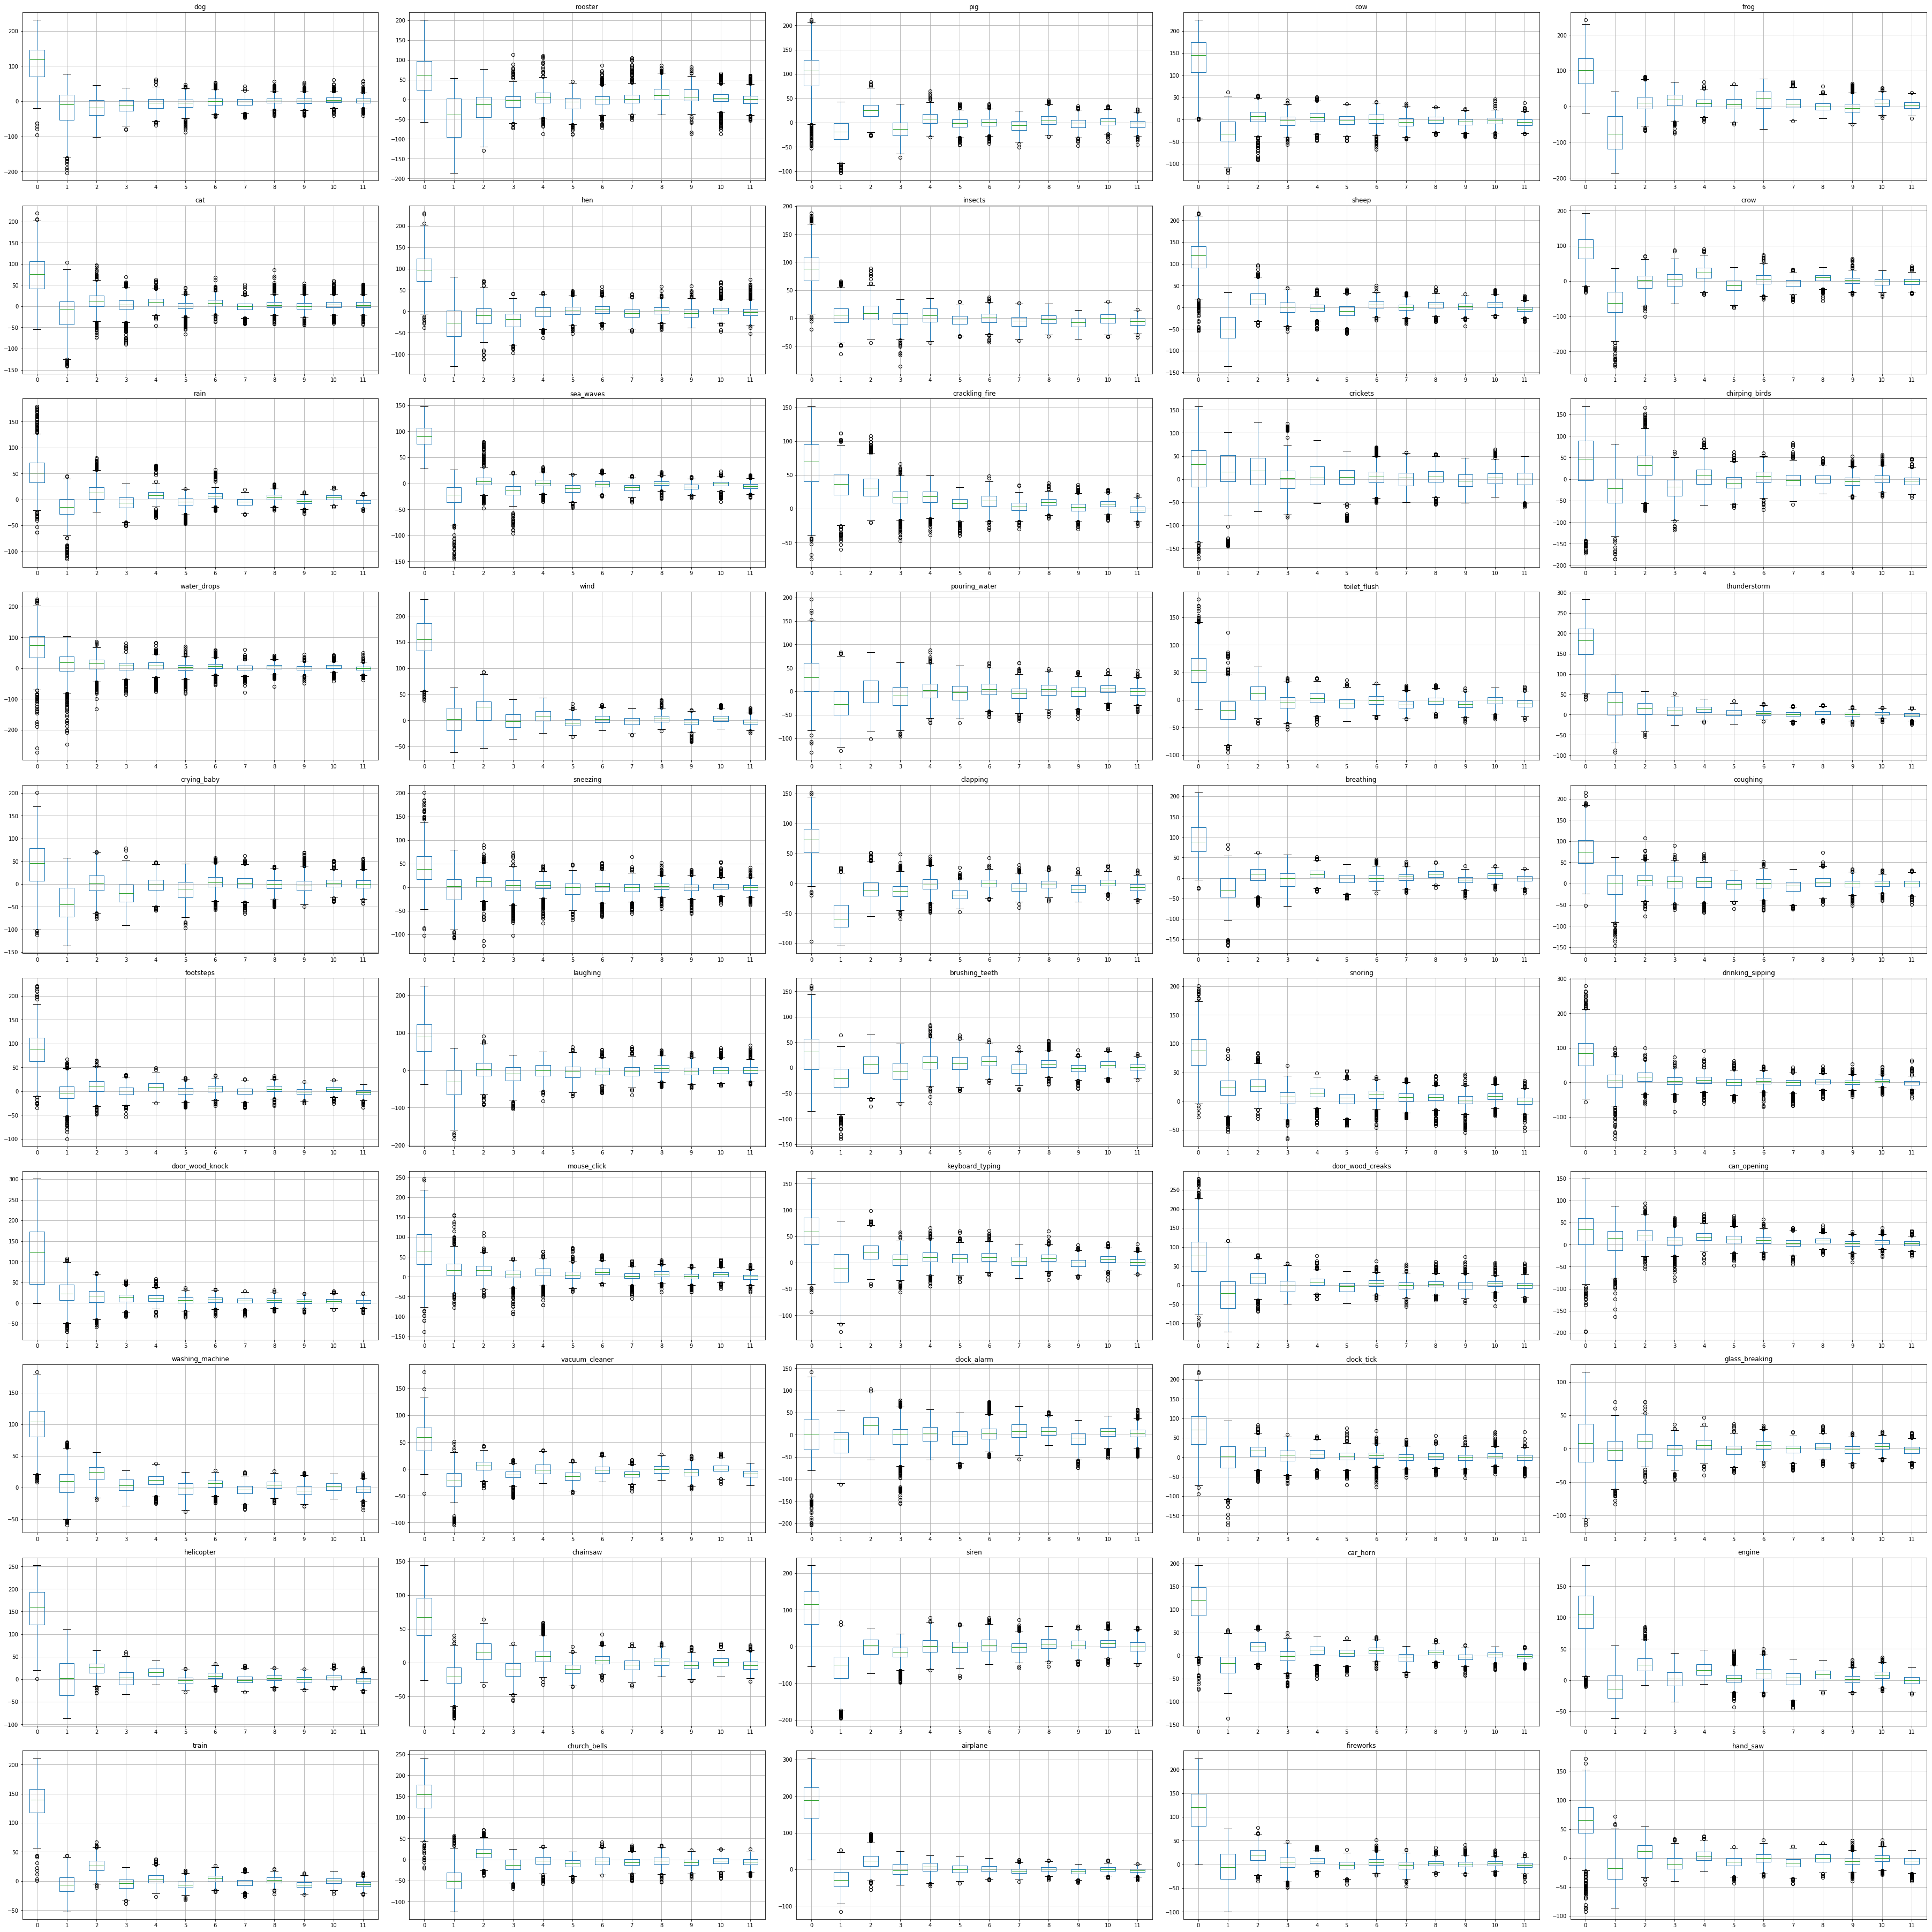

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i = 0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[0:12]].sample(sample_rate).boxplot(ax=ax)
    i+=1

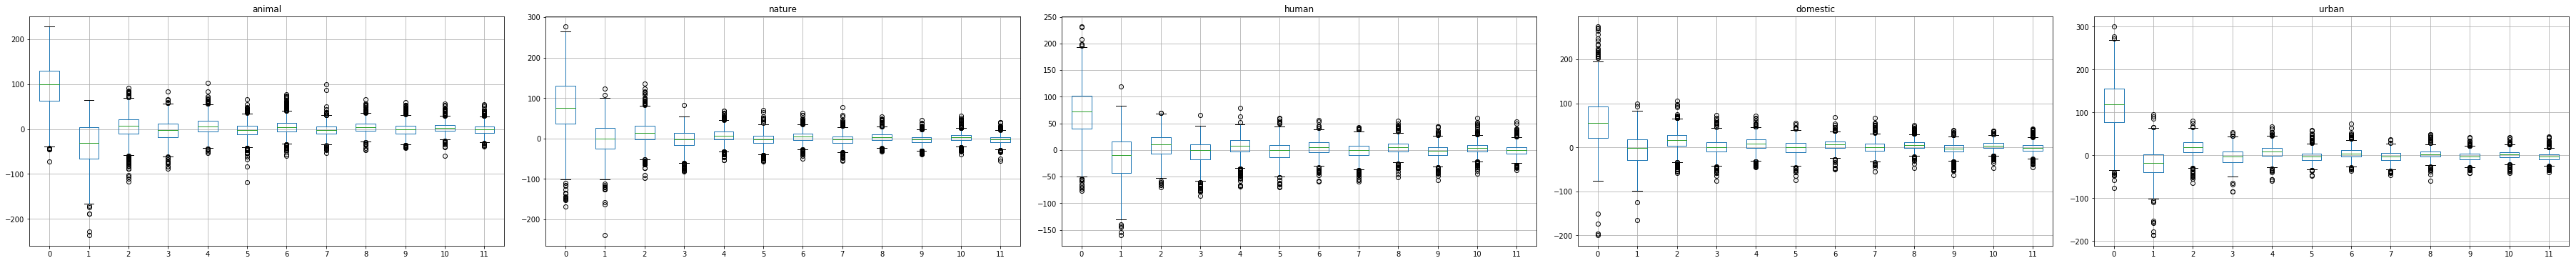

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[0:12]].sample(sample_rate).boxplot(ax=ax)
    i+=1

## Distribution of MFCC'

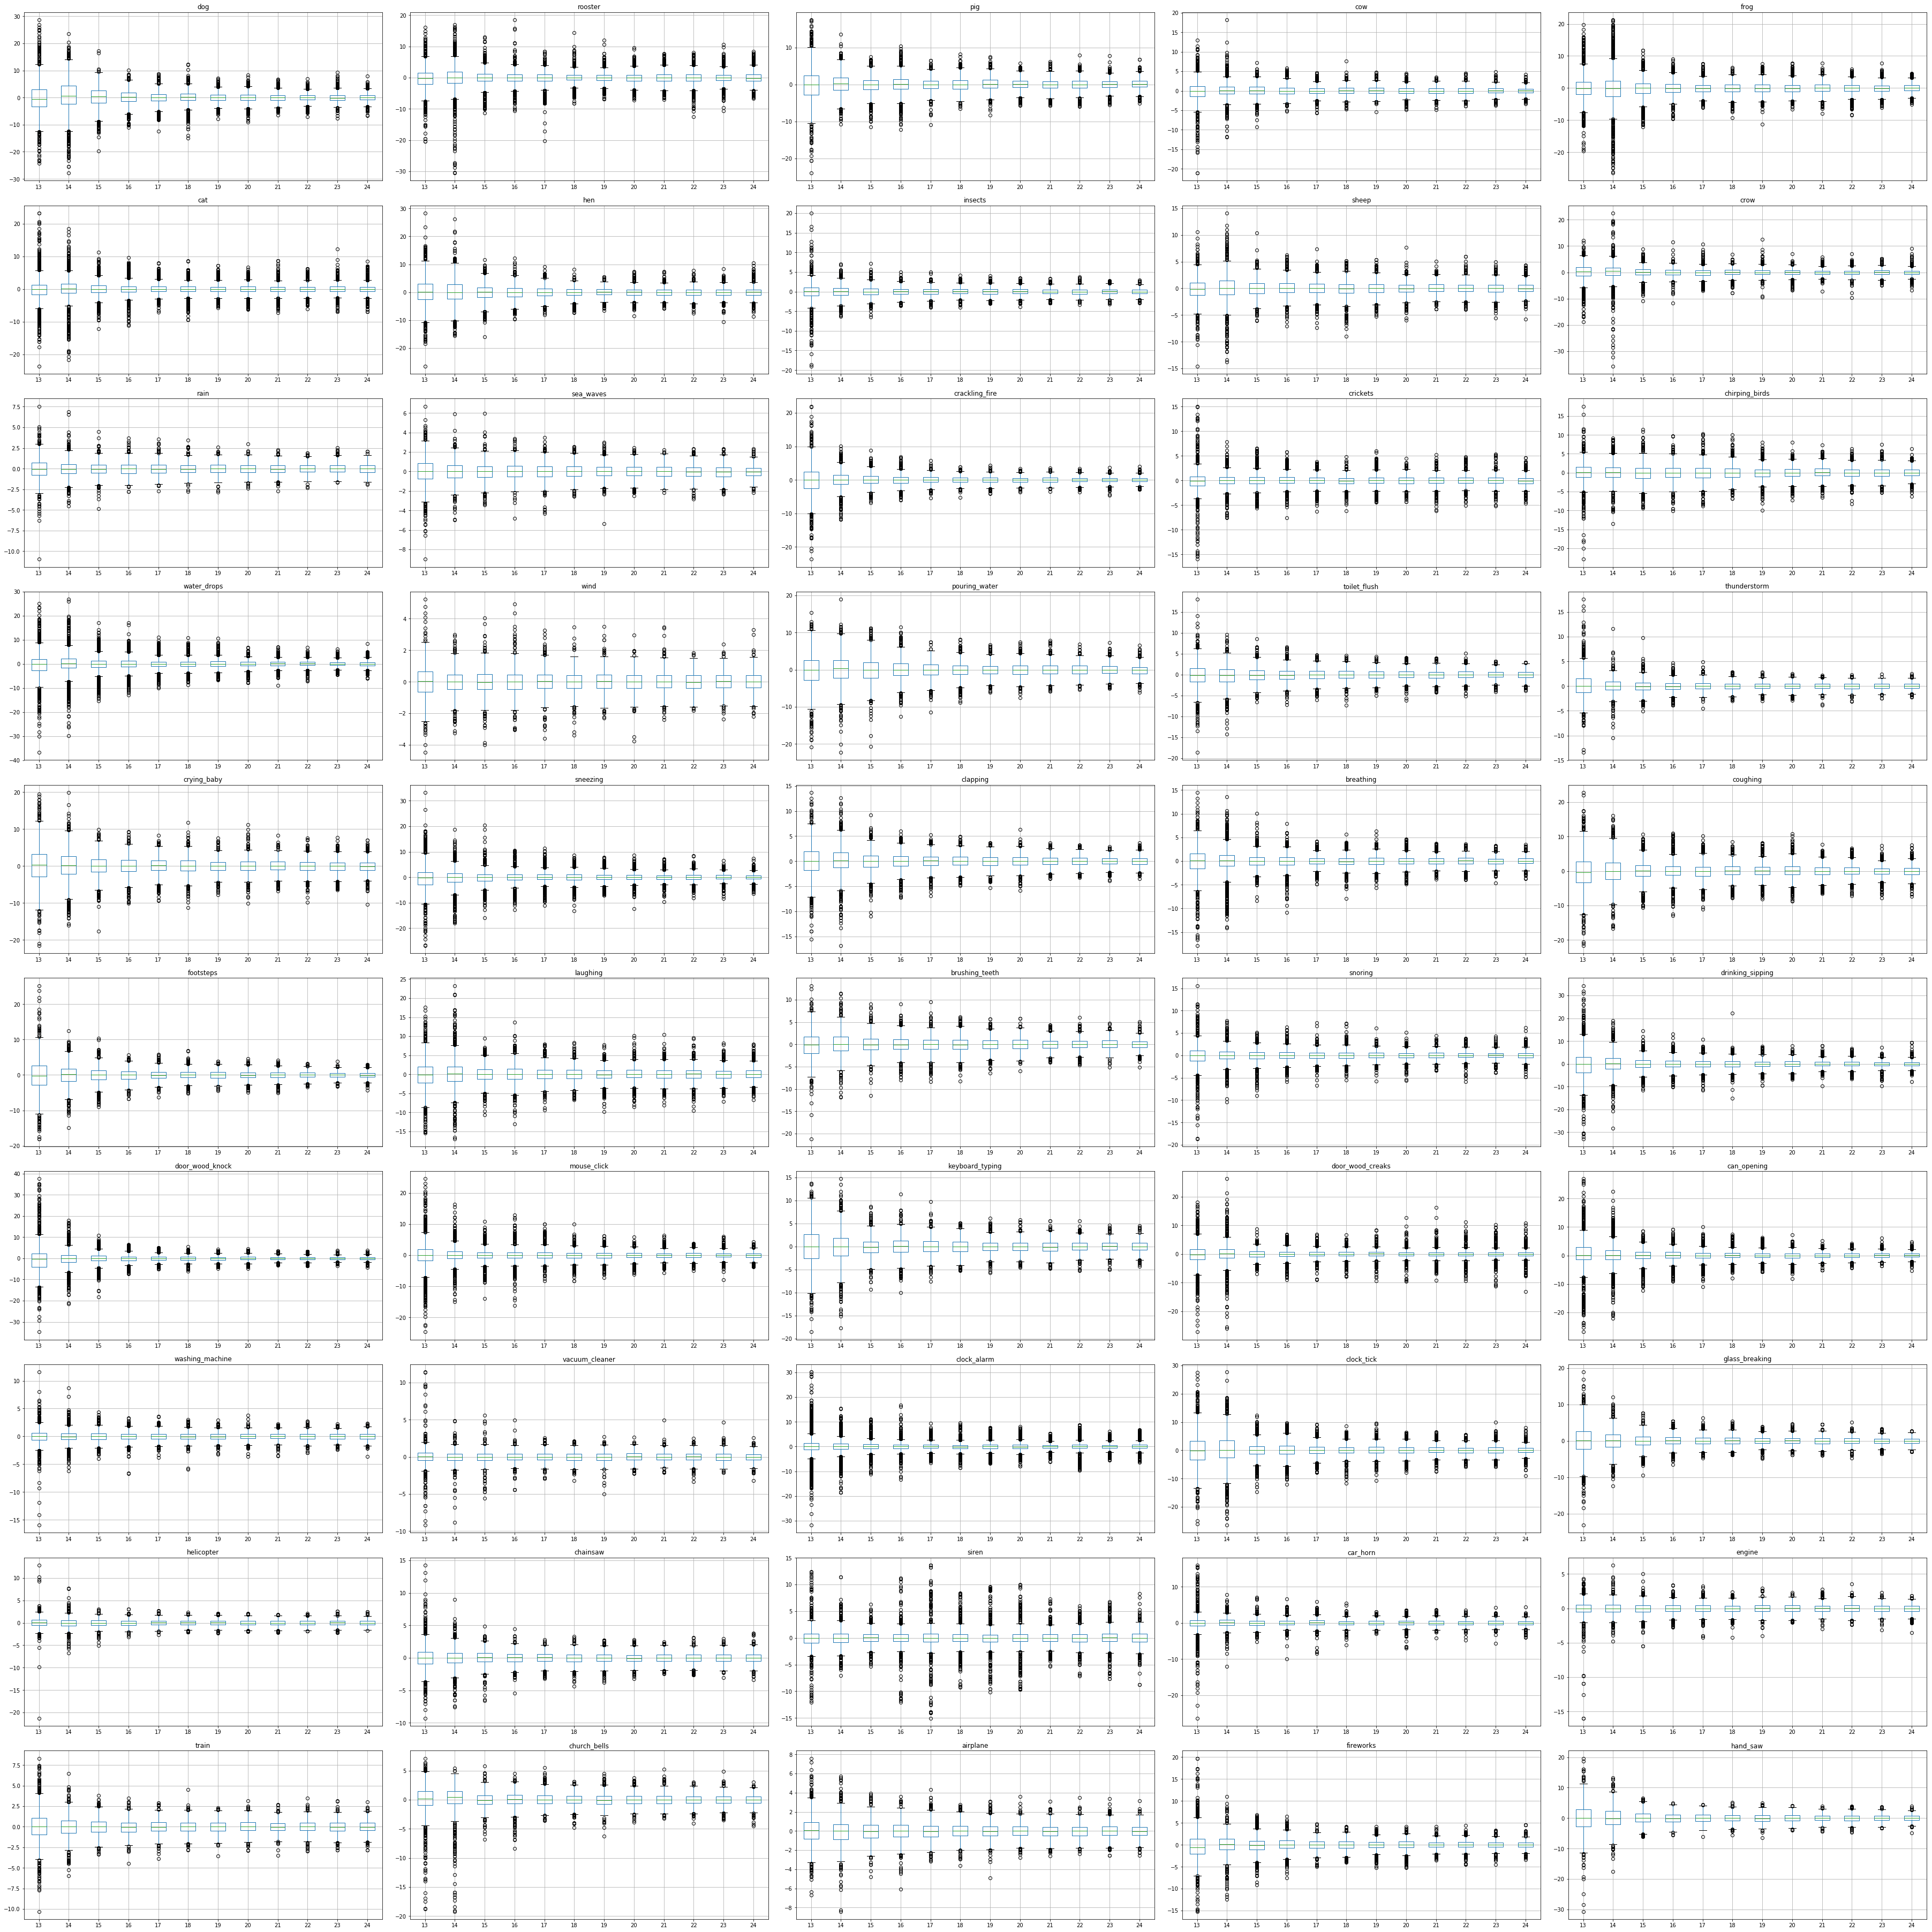

In [10]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[13:25]].sample(sample_rate).boxplot(ax=ax)
    i+=1

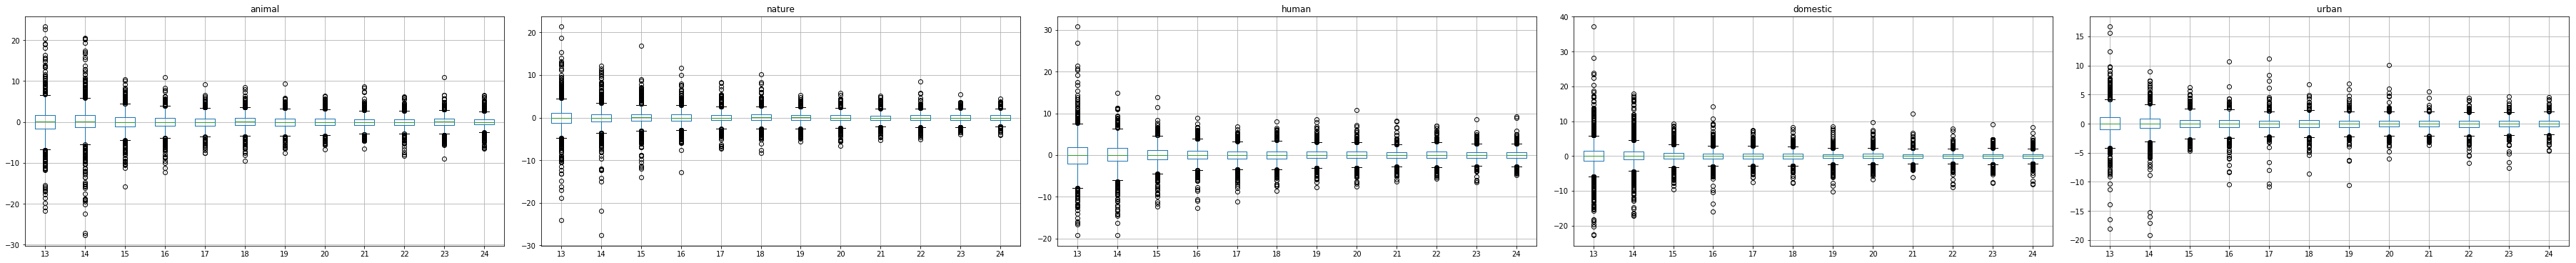

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[13:25]].sample(sample_rate).boxplot(ax=ax)
    i+=1

## Distribution of MFCC''

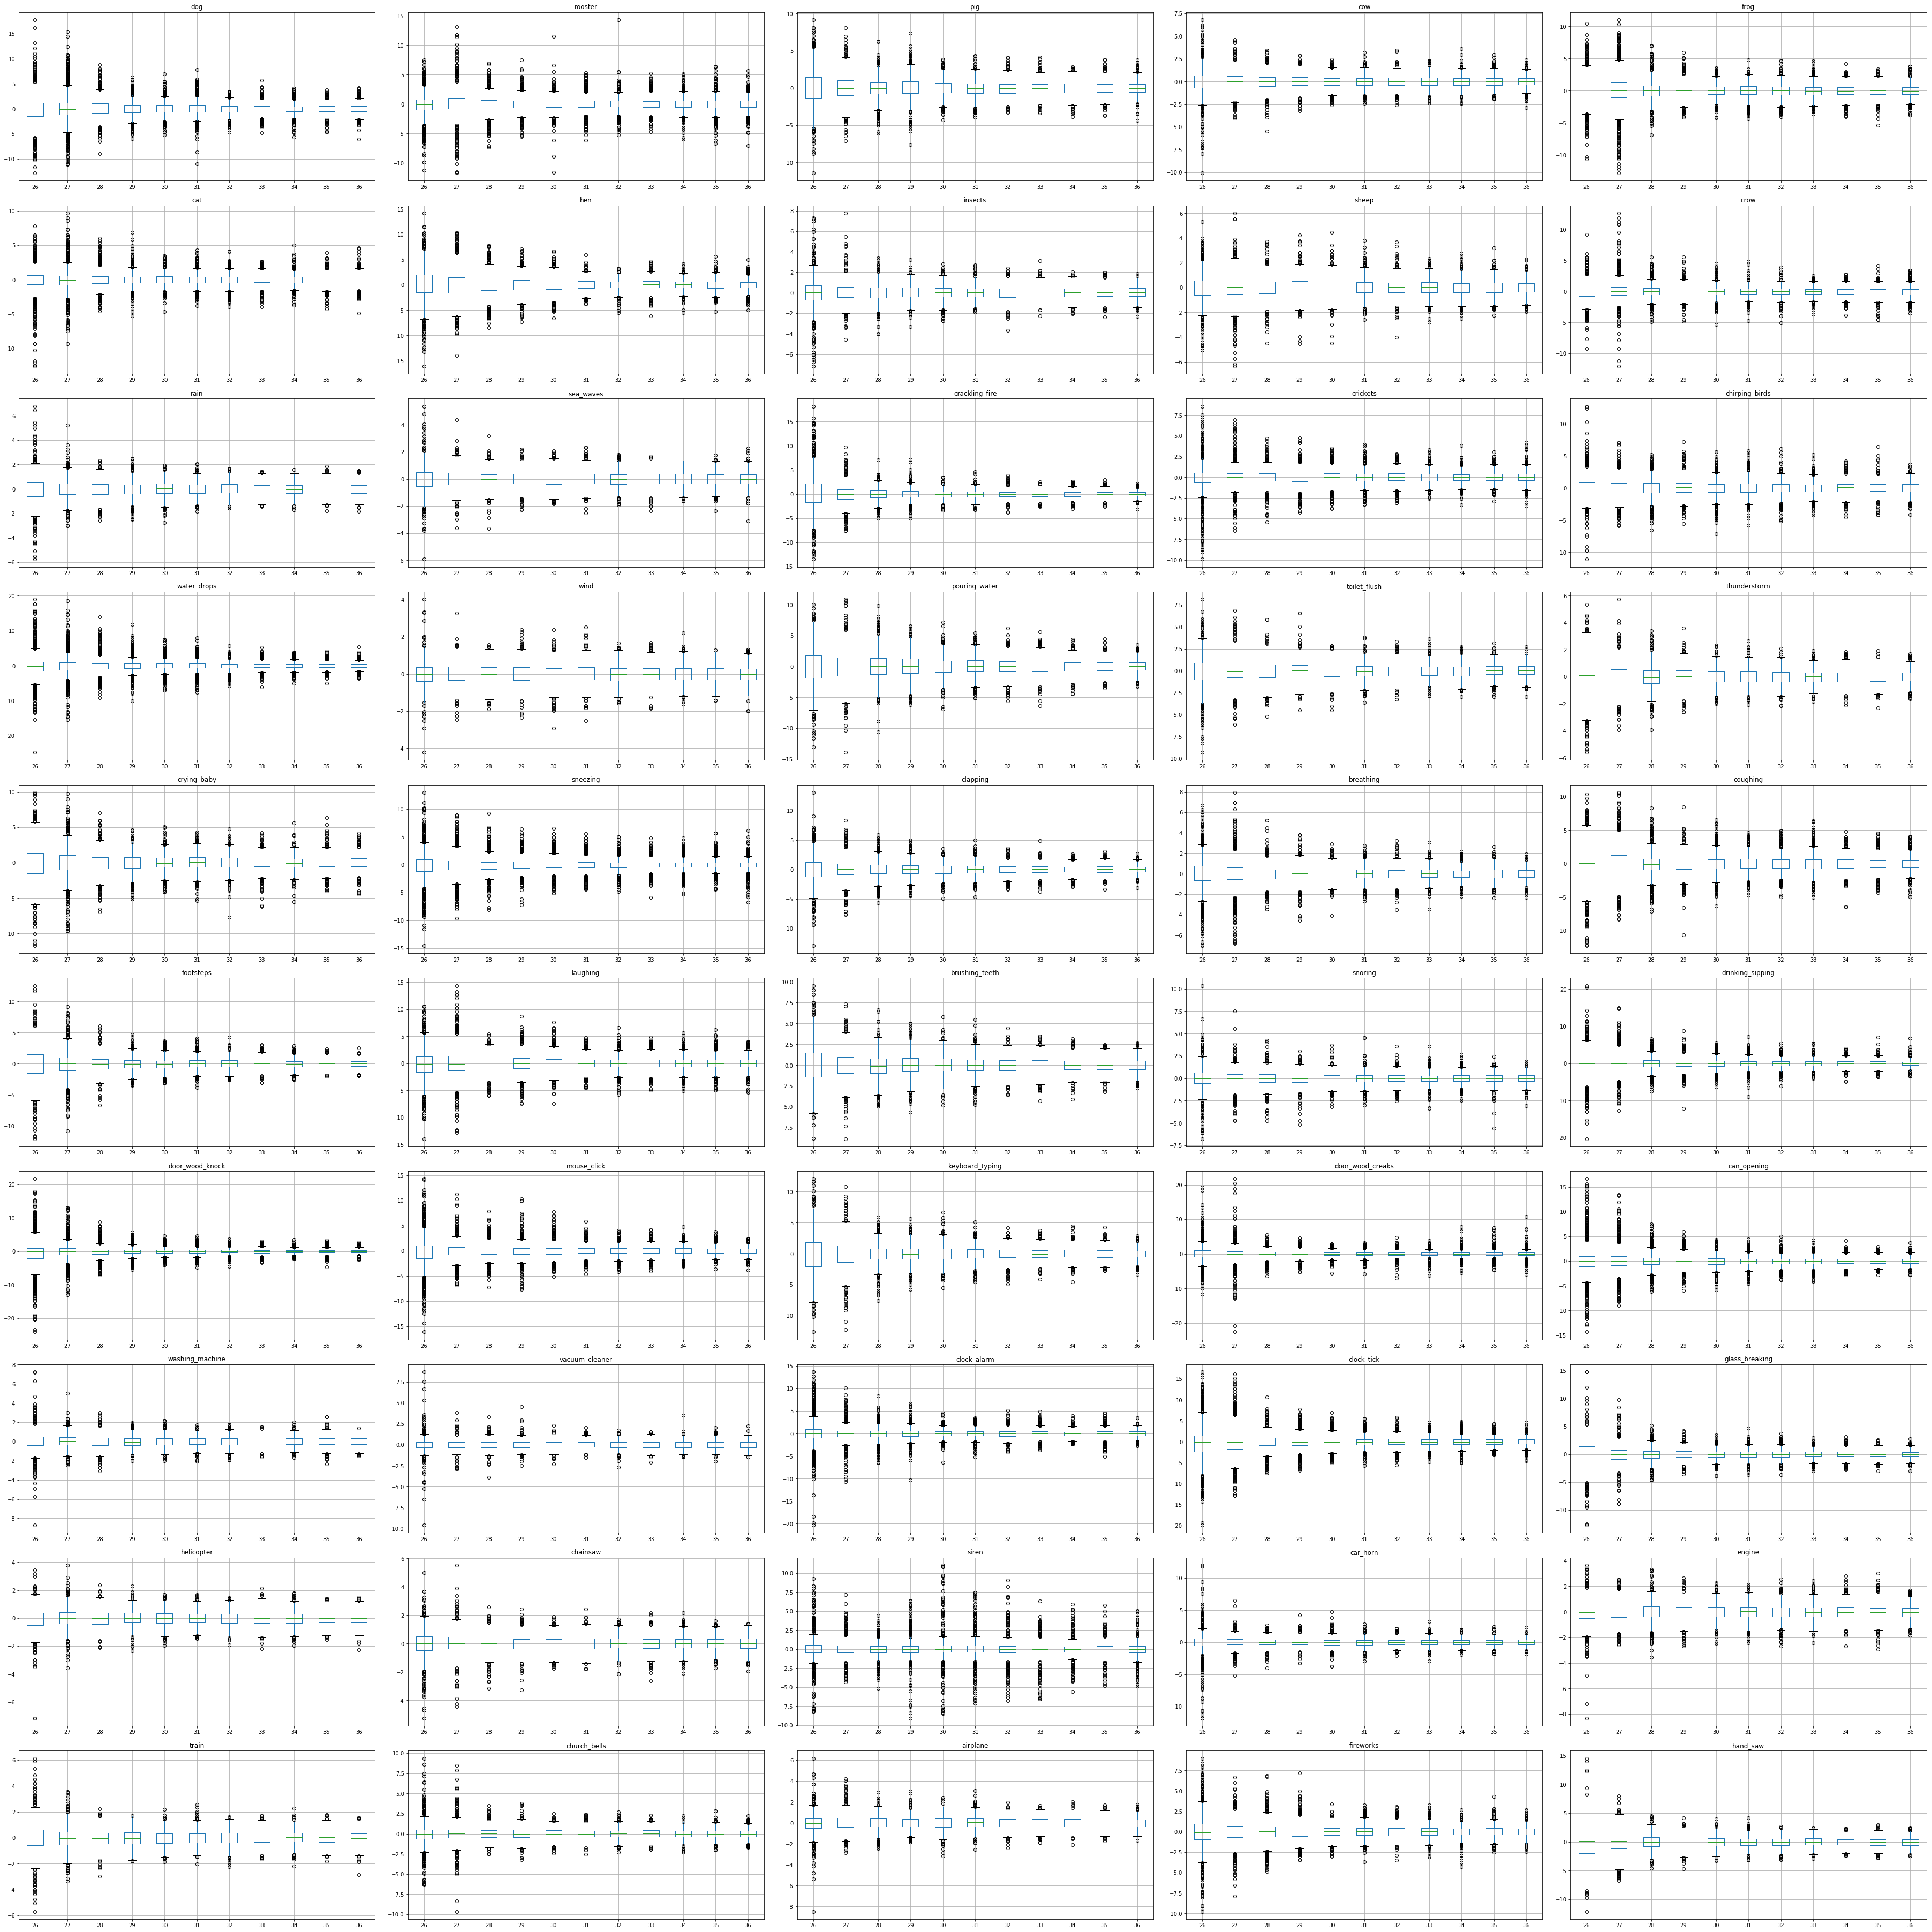

In [12]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[26:37]].sample(sample_rate).boxplot(ax=ax)
    i+=1

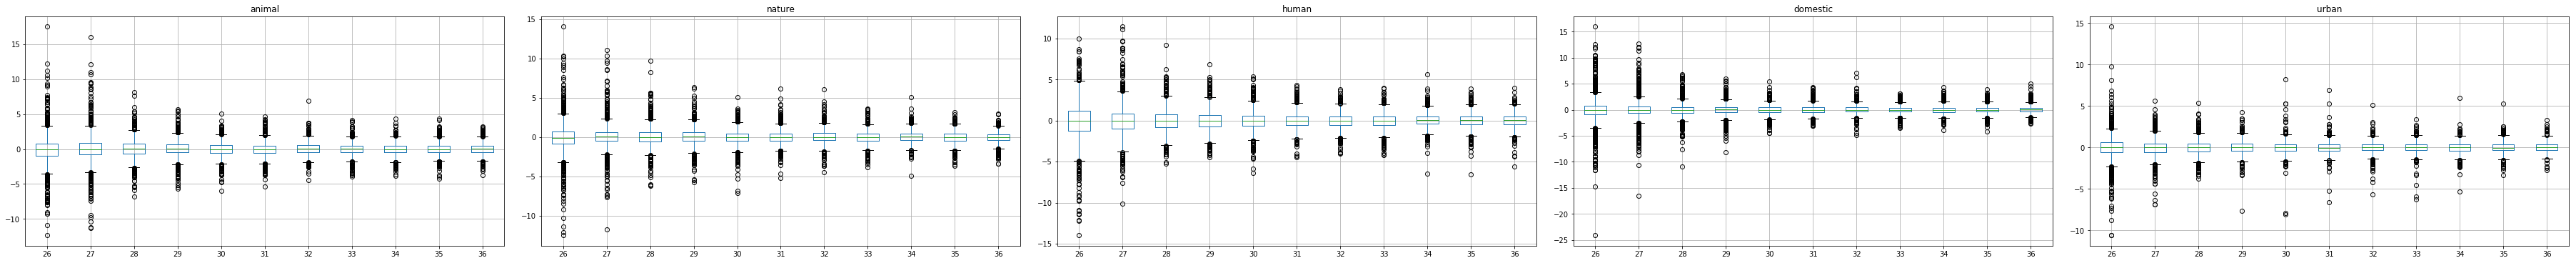

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[26:37]].sample(sample_rate).boxplot(ax=ax)
    i+=1